In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
!pwd

/home/anneconstance/code/migasar/kaggle-wagon552-shopee/notebooks


In [4]:
df = pd.read_csv('../raw_data/train.csv')

In [5]:
df.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [7]:
df.describe()

label_group
count  3.425000e+04
mean   2.128611e+09
std    1.234630e+09
min    2.580470e+05
25%    1.050720e+09
50%    2.120410e+09
75%    3.187910e+09
max    4.294197e+09

In [8]:
df['image'].shape

(34250,)

In [36]:
# labels = ['posting_id', 'image', 'image_phash', 'title', 'label_group']
# for label in labels: 
#     print(f"Unique values for {label} :", df[label].nunique())
df.nunique()

posting_id     34250
image          32412
image_phash    28735
title          33117
label_group    11014
dtype: int64

In [35]:
df.isna().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

In [37]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [38]:
from skimage import io
import os

In [70]:
filename = os.path.abspath(os.path.join('../raw_data/train_images', '3428ce52a9c43505865d2bdefab028fc.jpg'))
filename

'/home/anneconstance/code/migasar/kaggle-wagon552-shopee/raw_data/train_images/3428ce52a9c43505865d2bdefab028fc.jpg'

In [71]:
img = io.imread(filename)
img.shape

(640, 640, 3)

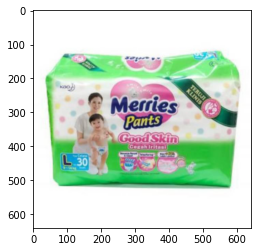

In [72]:
plt.imshow(img)

In [61]:
filename = os.path.abspath(os.path.join('../raw_data/train_images', '00b116ee1a2f59352756dceddf542943.jpg'))
filename

'/home/anneconstance/code/migasar/kaggle-wagon552-shopee/raw_data/train_images/00b116ee1a2f59352756dceddf542943.jpg'

In [62]:
img = io.imread(filename)
img.shape

(750, 750, 3)

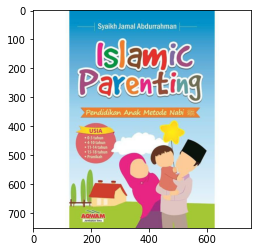

In [63]:
plt.imshow(img)

In [67]:
filename = os.path.abspath(os.path.join('../raw_data/train_images', 'b3651c76ca2d28e1b914e31c4c6588ae.jpg'))
filename

'/home/anneconstance/code/migasar/kaggle-wagon552-shopee/raw_data/train_images/b3651c76ca2d28e1b914e31c4c6588ae.jpg'

In [68]:
img = io.imread(filename)
img.shape

(686, 686, 3)

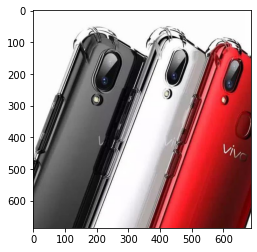

In [69]:
plt.imshow(img)

# Image preprocessing

## Resizing

We want to reshape the images in smaller size (state-of-the-art networks are trained on (224,224,3) images / tensors)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Reshape

# model = Sequential()
# model.add(Reshape((5*5*1,), input_shape=(5,5,1)))  # This flattens the (5, 5, 1) image to a vector of size 25
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='softmax')) 

## Intensity normalization

Neural networks converge faster if the inputs are somewhat normalized. Therefore we want to transform the image pixels with values between 0 and 255 (for each color) into values between -1 and 1, thanks to Keras libraries (or just by dividing all the data by 255)

## Data augmentation

Creation of additionnal data to explore : 
- Mirror
- Crop
- rotations
- slight transformation of the colors
- change of the textures
- "photoshop effects": blur, halo, ...
- deformations
- ...